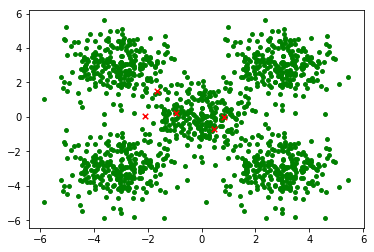

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math
from scipy.stats import multivariate_normal
%matplotlib inline


'''load all samples from file'''
file = 'multigauss.txt'
X = []
with open(file,'r') as f:
    for line in f:
        if '#' not in line:
            X.append(np.float_(line.split()))
X = np.array(X)


'''initialize parameters (suppose 5 clusters) \mu \sigma \pi'''
k = 5
size = 1250
Mu = 5 * np.random.random_sample((k,2)) - 2.5 # randomly initialize means between [-2.5, 2.5)
Pi = np.array([1.0 / k] * k)
sigma = np.cov(X[:,0],X[:,1])
Sigma = np.array([sigma] * k)


'''visualize the distribution and means of each cluster'''
"""define a function to visualize """
def visualize(X, Mu):
    fig = plt.figure()
    plt.scatter(X[:,0],X[:,1],15,color='green')
    plt.scatter(Mu[:,0],Mu[:,1],30,color='red',marker="x")
    plt.show()
    
visualize(X,Mu)

## Define some functions for EM algorithm


```getNewSigma``` based on W and Mu, to calculate new Sigma, which called in ```m_step()```  
```e_step``` Evaluate the responsibilities using the current parameter values  
```m_step``` Re-estimate the parameters using the current responsibilities (weight)  
```get_loglikelihood``` Evaluate the log likelihood 


In [23]:
def getNewSigma(Mu, W):
    NK = np.sum(W,axis=0).reshape(k,1)
    Sigma = []
    for i in range(k):
        rW = W[:,i].reshape(size,1) # N * 1
        rr =  np.repeat(rW,2,axis=1) # N * 2
        s = np.matmul((rr * (X-Mu[i])).T,(X-Mu[i])) # 2 * 2
        Sigma.append( s / NK[i])
    Sigma = np.array(Sigma)
    return Sigma # k * 2 * 2


def e_step(Pi,Mu,Sigma):
    W = [] # N*
    sum_of_all = 0
    for i in range(k):
        N = multivariate_normal.pdf(X, mean=Mu[i], cov=Sigma[i]) # (N,)
        sum_of_all += Pi[i] * N
    for i in range(k):
        N = multivariate_normal.pdf(X, mean=Mu[i], cov=Sigma[i]) # (N,)
        W.append(Pi[i] * N * 1.0 / sum_of_all)
    W = np.array(W).T
    return W 


def m_step(W):
    NK = np.sum(W,axis=0).reshape(k,1) # k * 1
    Mu = W.T.dot(X) / NK # k * 2 
    Sigma = getNewSigma(Mu, W) # 5 * 2 * 2
    return Mu, Sigma, Pi


def get_loglikelihood(Pi,Mu,Sigma):
    loglike = .0
    for n in range(len(X)):
        sum = .0
        for i in range(k):
            sum += Pi[i] * multivariate_normal.pdf(X[n], mean=Mu[i], cov=Sigma[i])
        loglike += np.log(sum)
    return loglike

Initial log likelihood  -6198.890707839377


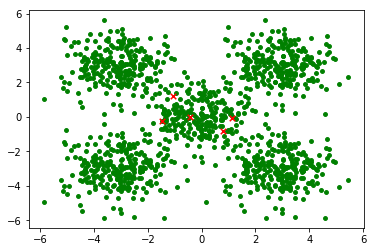

nIter : 1  log likelihood : -6164.0142581380205


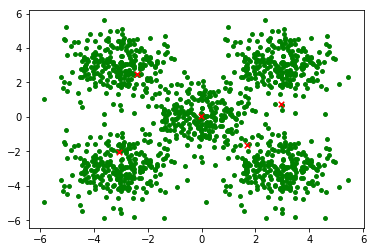

nIter : 11  log likelihood : -5771.1419144233305


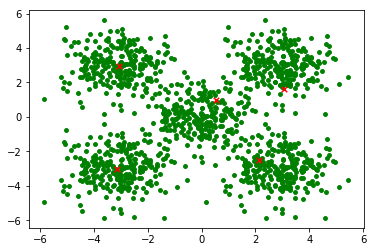

nIter : 21  log likelihood : -5547.09324970434


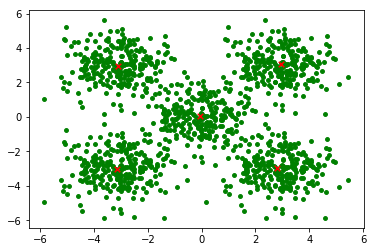

nIter : 31  log likelihood : -5400.209967704776


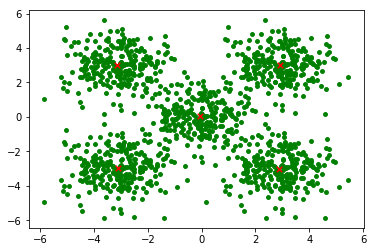

nIter : 41  log likelihood : -5389.147795762331


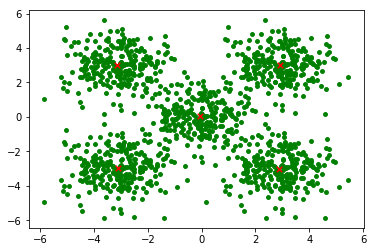

nIter : 51  log likelihood : -5389.14331047647


In [24]:
print 'Initial log likelihood ',get_loglikelihood(Pi,Mu,Sigma)

nIter = 60
for i in range(nIter):
    
    W = e_step(Pi,Mu,Sigma)  
    Mu, Sigma, Pi = m_step(W)
    log = get_loglikelihood(Pi.copy(),Mu.copy(),Sigma.copy())
    if i % 10 == 0: # plot
        fig = plt.figure()
        plt.scatter(X[:,0],X[:,1],15,color='green')
        plt.scatter(Mu[:,0],Mu[:,1],30,color='red',marker="x")
        plt.show()
        print 'nIter :', i+1, ' log likelihood :', log


From the result, we could see the algorithm finally converged. The means no longer change. Sometimes, the number of iterations to converge depends on the initialized parameters.